## SANTIAGO BARCO
## RAFAEL NIÑO

# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [5]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('../datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [6]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

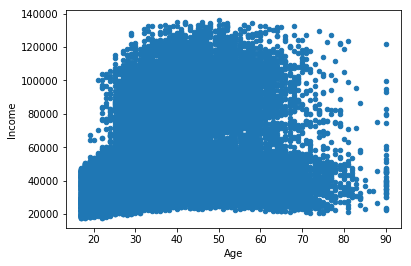

In [54]:
income.plot(x='Age', y='Income', kind='scatter') #Relación entre edad e ingreso

In [55]:
x=income[['Age']].values


In [56]:
y=income[['Income']].values


In [57]:
#Regresión Lineal

from sklearn.linear_model import LinearRegression

linreg=LinearRegression(fit_intercept=True)

linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Se estima la ecuación de la regresión

In [58]:
linreg.coef_ ,linreg.intercept_

#yest=32538.0813087+542.16765707x

#para el caso general (linreg.coef_)*(x)*(0,01)#

(array([[ 542.16765707]]), array([ 32538.08813087]))

### Aumento del 1% en la edad

In [59]:
## Para x = 30
z_pred1 = linreg.predict(30)
z_pred1

# para x = 30.3
z_pred2 = linreg.predict(30.3)
z_pred2

dif1=z_pred2-z_pred1
dif1

#Para este caso se determina la diferencia como 542.16765707*30*0,01=162.65029712
#Que es la diferencia si se aumenta en un uno pr ciento la edad


array([[ 162.65029712]])

In [60]:
z_pred1

array([[ 48803.11784304]])

In [61]:
z_pred2

array([[ 48965.76814016]])

In [62]:
# SE calcula la diferencia
dif1

array([[ 162.65029712]])

### REALIZACIÓN DEL MODELO COMPLETO

In [63]:

y_pred = linreg.predict(x)
y_pred

array([[ 53682.62675669],
       [ 59646.47098449],
       [ 53140.45909962],
       ..., 
       [ 63983.81224107],
       [ 44465.77658646],
       [ 60730.80629863]])

In [64]:
y_pred.sum()

1740574602.0

### Para la edad de 30

In [65]:

z_pred = linreg.predict(30)
z_pred


array([[ 48803.11784304]])

In [66]:

z_pred = linreg.predict(40)
z_pred


array([[ 54224.79441376]])

# Exercise 2.2
Evaluate the model using the MSE

In [67]:
print("Residuos de la suma de cuadrados: %.2f"
 % np.mean((y - linreg.predict(x)) ** 2))

Residuos de la suma de cuadrados: 593783043.84


In [68]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(income['Income'], y_pred))
print('MSE:', metrics.mean_squared_error(income['Income'],y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred)))
y_pred = linreg.predict(x)

MAE: 19027.654314
MSE: 593783043.84
RMSE: 24367.6638979



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [69]:
income['Age2'] = (income['Age']*income['Age'])
income['Age2'].value_counts()
income['Age'].value_counts()
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


In [70]:
### variables del modelo
x=income[['Age','Age2']].values
y=income[['Income']].values

In [71]:
x
#Se observa que el modelo ahora tiene AGE y AGE AL CUADRADO

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       ..., 
       [  58, 3364],
       [  22,  484],
       [  52, 2704]], dtype=int64)

In [72]:
# import
from sklearn.linear_model import LinearRegression
# Initialize
linreg = LinearRegression(fit_intercept=True)
# Fit
linreg.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
## Coeficiencientes del modelo

linreg.coef_

array([[ 3131.77014151,   -30.54341041]])

In [74]:
linreg.intercept_

array([-16225.07097407])

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [75]:
x24=income[['Age','Education-Num','Hours per week','Capital Gain']].values
x24

array([[   39,    13,    40,  2174],
       [   50,    13,    13,     0],
       [   38,     9,    40,     0],
       ..., 
       [   58,     9,    40,     0],
       [   22,     9,    20,     0],
       [   52,     9,    40, 15024]], dtype=int64)

In [76]:
y24=income[['Income']].values
y24

array([[ 51806.],
       [ 68719.],
       [ 51255.],
       ..., 
       [ 26801.],
       [ 44644.],
       [ 69359.]])

In [82]:
#Regresión Lineal con más variables para estimar

from sklearn.linear_model import LinearRegression

linreg=LinearRegression(fit_intercept=True)

linreg.fit(x24,y24)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
linreg.coef_ ,linreg.intercept_

(array([[  4.71500536e+02,   3.71670865e+03,   4.13552309e+02,
           4.59457777e-01]]), array([-19420.54340486]))

In [84]:
y24_pred = linreg.predict(x24)
y24_pred

array([[ 64826.14346151],
       [ 57847.87579625],
       [ 48488.94713372],
       ..., 
       [ 57918.95784503],
       [ 32673.89237972],
       [ 61992.84827057]])

In [85]:
y_pred24 = linreg.predict(income[['Age','Education-Num','Hours per week','Capital Gain']])
y_pred24

array([[ 64826.14346151],
       [ 57847.87579625],
       [ 48488.94713372],
       ..., 
       [ 57918.95784503],
       [ 32673.89237972],
       [ 61992.84827057]])

### Estimación del modelo con mas features

In [86]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(income['Income'], y_pred24))
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred24))
print('RMSE:', np.sqrt(metrics.mean_squared_error(income['Income'], y_pred24)))

MAE: 16486.1670085
MSE: 440556050.914
RMSE: 20989.4271221


# Conclusión:

Resultado primer modelo con solo Age
MAE: 19027.654314
MSE: 593783043.84
RMSE: 24367.6638979

Resultados con mas variables
MAE: 16486.1670085
MSE: 440556050.914
RMSE: 20989.4271221


Se observa que el mejor modelo es el resultado con mas variables,
ya que los errores son menores



# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

In [87]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

In [88]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age2,isUS
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809,1.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784,0.0


Se usa la variable iUS para la regresión

In [89]:
income.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Income,Age2,isUS
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,53455.809158,1674.599152,0.895857
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,25465.530461,1179.047521,0.305451
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,17636.000000,289.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,35503.000000,784.000000,1.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,44978.000000,1369.000000,1.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,63548.000000,2304.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,136063.000000,8100.000000,1.000000


# Crear variables categoricas

In [90]:
Race_dummies = pd.get_dummies(income.Race, prefix='Race')
Race_dummies.drop(Race_dummies.columns[0], axis=1, inplace=True)
Race_dummies

,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
5,0,0,0,1
6,0,1,0,0
7,0,0,0,1
8,0,0,0,1
9,0,0,0,1


In [91]:
# se concatena la variable categorica
income = pd.concat([income, Race_dummies], axis=1)

In [92]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,...,Capital Loss,Hours per week,Country,Income,Age2,isUS,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,51806.0,1521,1.0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,68719.0,2500,1.0,0,0,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,51255.0,1444,1.0,0,0,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,47398.0,2809,1.0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,30493.0,784,0.0,0,1,0,0


In [93]:
Sex_dummies = pd.get_dummies(income.Sex, prefix='Sex')
Sex_dummies.drop(Sex_dummies.columns[0], axis=1, inplace=True)
Sex_dummies

,Sex_Male
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,1


In [94]:
# se concatena la variable categorica
income = pd.concat([income, Sex_dummies], axis=1)

In [96]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,...,Hours per week,Country,Income,Age2,isUS,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Sex_Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,40,United-States,51806.0,1521,1.0,0,0,0,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,68719.0,2500,1.0,0,0,0,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,51255.0,1444,1.0,0,0,0,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,47398.0,2809,1.0,0,1,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,30493.0,784,0.0,0,1,0,0,0


In [118]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['Age','Income','Education-Num','Capital Gain','Hours per week', 'Race_Black',
               'Race_Other',
              'Race_White', 'Sex_Male'
               ]
X = income[feature_cols]
y = income.isUS

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)


#logreg.fit(X, y)
#income['isUS_pred_class'] = logreg.predict(X)

In [119]:
res = logreg.fit(X_train, y_train)
res

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [120]:
X.head()

,Age,Income,Education-Num,Capital Gain,Hours per week,Race_Black,Race_Other,Race_White,Sex_Male
0,39,51806.0,13,2174,40,0,0,1,1
1,50,68719.0,13,0,13,0,0,1,1
2,38,51255.0,9,0,40,0,0,1,1
3,53,47398.0,7,0,40,1,0,0,1
4,28,30493.0,13,0,40,1,0,0,0


In [121]:
X.describe()

,Age,Income,Education-Num,Capital Gain,Hours per week,Race_Black,Race_Other,Race_White,Sex_Male
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,53455.809158,10.080679,1077.648844,40.437456,0.095943,0.008323,0.854274,0.669205
std,13.640433,25465.530461,2.572720,7385.292085,12.347429,0.294518,0.090851,0.352837,0.470506
min,17.000000,17636.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,35503.000000,9.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,44978.000000,10.000000,0.000000,40.000000,0.000000,0.000000,1.000000,1.000000
75%,48.000000,63548.000000,12.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,136063.000000,16.000000,99999.000000,99.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: isUS, dtype: float64

In [123]:
### NATRIZ DE CONFUSIÓN
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)


array([[   0,  850],
       [   0, 7291]], dtype=int64)

## CURVA ROC DEL MODELO

In [125]:
#PREDICE SI ES DE ESTADOS UNIDOS O NO
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob

array([ 0.95013732,  0.77877591,  0.89324985, ...,  0.85979886,
        0.89674431,  0.84134147])

In [126]:
# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.895590222331


Text(0,0.5,'True Positive Rate (Sensitivity)')

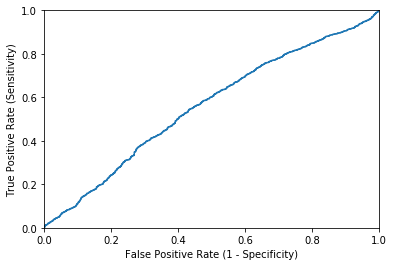

In [127]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [128]:
## CALCULO DEL AUC

# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.55784359444


## Se realizan varias pruebas del modelo

In [129]:
res=[]
for i in range(50):
    # train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3*i)

    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = logreg.predict(X_test)

    # calculate testing accuracy
    res.append(metrics.accuracy_score(y_test, y_pred_class))

In [130]:
pd.Series(res).describe()

count    50.000000
mean      0.895489
std       0.002605
min       0.890185
25%       0.893871
50%       0.895836
75%       0.897248
max       0.901978
dtype: float64

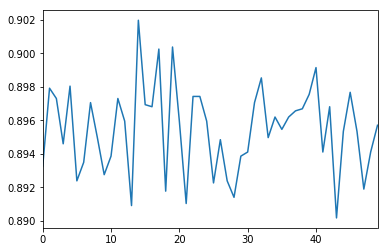

In [131]:
pd.Series(res).plot()
## Se observa que el performance del modelo  tiene mucha varianza

In [132]:
###+ USANDO K FOLDS

from sklearn.cross_validation import KFold

# Create k-folds
kf = KFold(X.shape[0], n_folds=10, random_state=0)

results = []

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train a logistic regression model
    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)

    # make predictions for testing set
    y_pred_class = logreg.predict(X_test)

    # calculate testing accuracy
    results.append(metrics.accuracy_score(y_test, y_pred_class))

In [133]:
pd.Series(results).describe()

count    10.000000
mean      0.895857
std       0.004566
min       0.888514
25%       0.891969
50%       0.897129
75%       0.897420
max       0.902641
dtype: float64

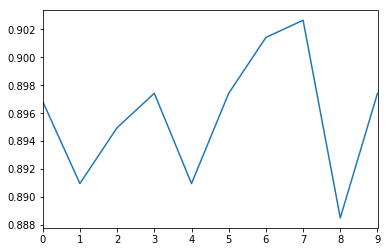

In [134]:
## GRAFICA USANDO K FOLS

pd.Series(results).plot()

In [135]:
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression(C=1e9)

results = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

In [136]:
pd.Series(results).describe()

count    10.000000
mean      0.895857
std       0.000087
min       0.895609
25%       0.895885
50%       0.895885
75%       0.895885
max       0.895885
dtype: float64

## PERFORMANCE DEL MODELO

Se concluye que el performance del modelo se acerca a 0.89

## Santiago Barco
## Rafael NIño